In [1]:
import importlib

import datamanip
from train_eval.evaluate import evaluate_ensamble, evaluate
from utils import load_best_model_based_on_match

importlib.reload(datamanip)

import torch
from torch_geometric.loader import DataLoader
from filepath import *
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.plots import generate_matrix

In [2]:
test_set = ThreeFiveDataset(root=dataset_path, match='ensemble', test_train_val="test")
val_set = ThreeFiveDataset(root=dataset_path, match='ensemble', test_train_val="val")
test_loader = DataLoader(test_set, batch_size=1, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1, shuffle=True)


In [3]:

matches = ["1-1", "2-1", "2-2", "3-1", "3-2", "3-3", "3-4"]
ensemble = {}
for match in matches:
    ensemble[match] = load_best_model_based_on_match(match)


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
predictions, true_classes, distance, accuracy, rmse = evaluate_ensamble(device, ensemble, test_loader)

In [5]:
print(f"Cumulative distance is {distance}")
print(f"RMSE is {rmse}")
print(f"Accuracy is {accuracy}")

Cumulative distance is 4141
RMSE is 0.4883320418802964
Accuracy is 0.8167002591419522


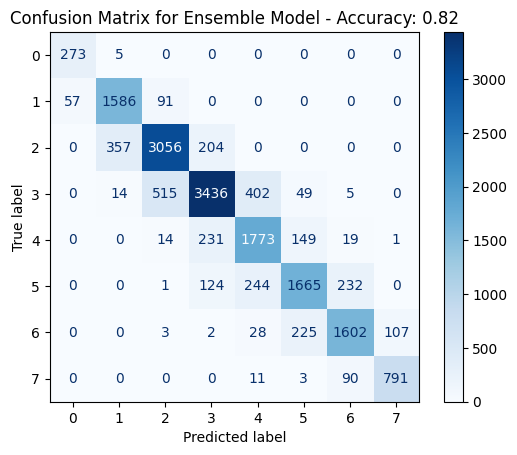

In [6]:
generate_matrix(true_classes, predictions, accuracy, "Ensemble Model")